<a href="https://colab.research.google.com/github/fredionix/mnist-digit-recognition/blob/master/mnist_train_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import initialization
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout,Activation
from keras.models import load_model



Using TensorFlow backend.


In [0]:
#import CNN layers
from keras.layers import Convolution2D, MaxPooling2D



In [0]:
#import keras utilities
from keras.utils import np_utils

In [0]:
from keras.datasets import mnist

In [0]:
#load the mnist data
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
print(xtrain.shape)

(60000, 28, 28)


In [0]:
from matplotlib import pyplot as plt

5


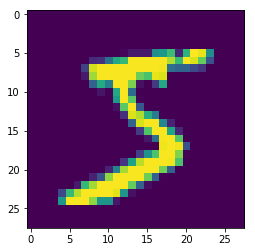

In [0]:
plt.imshow(xtrain[0])
print(ytrain[0])



7


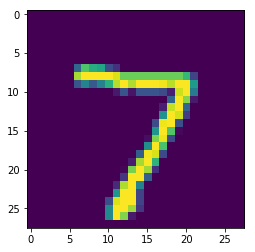

In [0]:
#PREPROCESS INPUT
plt.imshow(xtest[0])
print(ytest[0])

In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)
xtest = xtest.reshape(xtest.shape[0],28,28,1) #[0],depth color, width, height
print (xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /=255
xtest /=255

In [0]:
print(ytrain.shape)
print(ytest.shape)
# (60000,)

(60000,)
(10000,)


In [0]:
print(ytrain[:10])
# [5 0 4 1 9 2 1 3 1 4]
print(ytest[:10])

[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


In [0]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /= 255
xtest /= 255

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
#one hot encoding or dummy encoding with 10 dimension row
ytrain = np_utils.to_categorical(ytrain, 10)
ytest = np_utils.to_categorical(ytest, 10)


In [0]:
print(ytrain)
print("YTRAIN = ", ytrain.shape)
print("X TRAIN = ", xtrain.shape)
# (60000, 10)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
YTRAIN =  (60000, 10)
X TRAIN =  (60000, 28, 28, 1)


In [0]:
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model.fit(xtrain, ytrain, 
          batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 14s 230us/step - loss: 1.0005 - acc: 0.6594
Epoch 2/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.5015 - acc: 0.8432
Epoch 3/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.4583 - acc: 0.8589
Epoch 4/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.4299 - acc: 0.8663
Epoch 5/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.4146 - acc: 0.8712
Epoch 6/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.3984 - acc: 0.8752
Epoch 7/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.3949 - acc: 0.8774
Epoch 8/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.3817 - acc: 0.8808
Epoch 9/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.3738 - acc: 0.8836
Epoch 10/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.3682 - 

In [0]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'


In [0]:
model = load_model('my_model.h5')


In [0]:
score = model.evaluate(xtest, ytest, verbose=0)
print(score)

[0.16307910371273757, 0.9522]


3


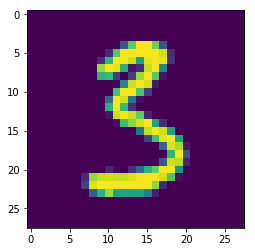

In [0]:
image_index = 890
plt.imshow(xtest[image_index].reshape(28, 28))
pred = model.predict(xtest[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())